In [46]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('ieee')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [47]:
omR,kR,t,z,phi = sp.symbols('omega_R k_R t z phi', real = True)
#q0 = sp.Function('q_0',real=True)(t)
q0 = sp.symbols('q_0')
q_t = q0*sp.exp(sp.I*(kR*z-omR*t)+sp.I*phi)
q_t = q_t + sp.conjugate(q_t)
q_t

q_0*exp(I*phi + I*(k_R*z - omega_R*t)) + exp(-I*phi - I*(k_R*z - omega_R*t))*conjugate(q_0)

In [48]:
def q_t(q0_s,omR_s,kR_s,t_s,z_s,phi_s):
    return 0.5*q0_s*np.exp(1j*(kR_s*z_s-omR_s*t_s)+1j*phi_s) + 0.5*q0_s*np.exp(-1j*(kR_s*z_s-omR_s*t_s)-1j*phi_s)
    #return q0_s*np.cos(kR_s*z_s-omR_s*t_s+phi_s)

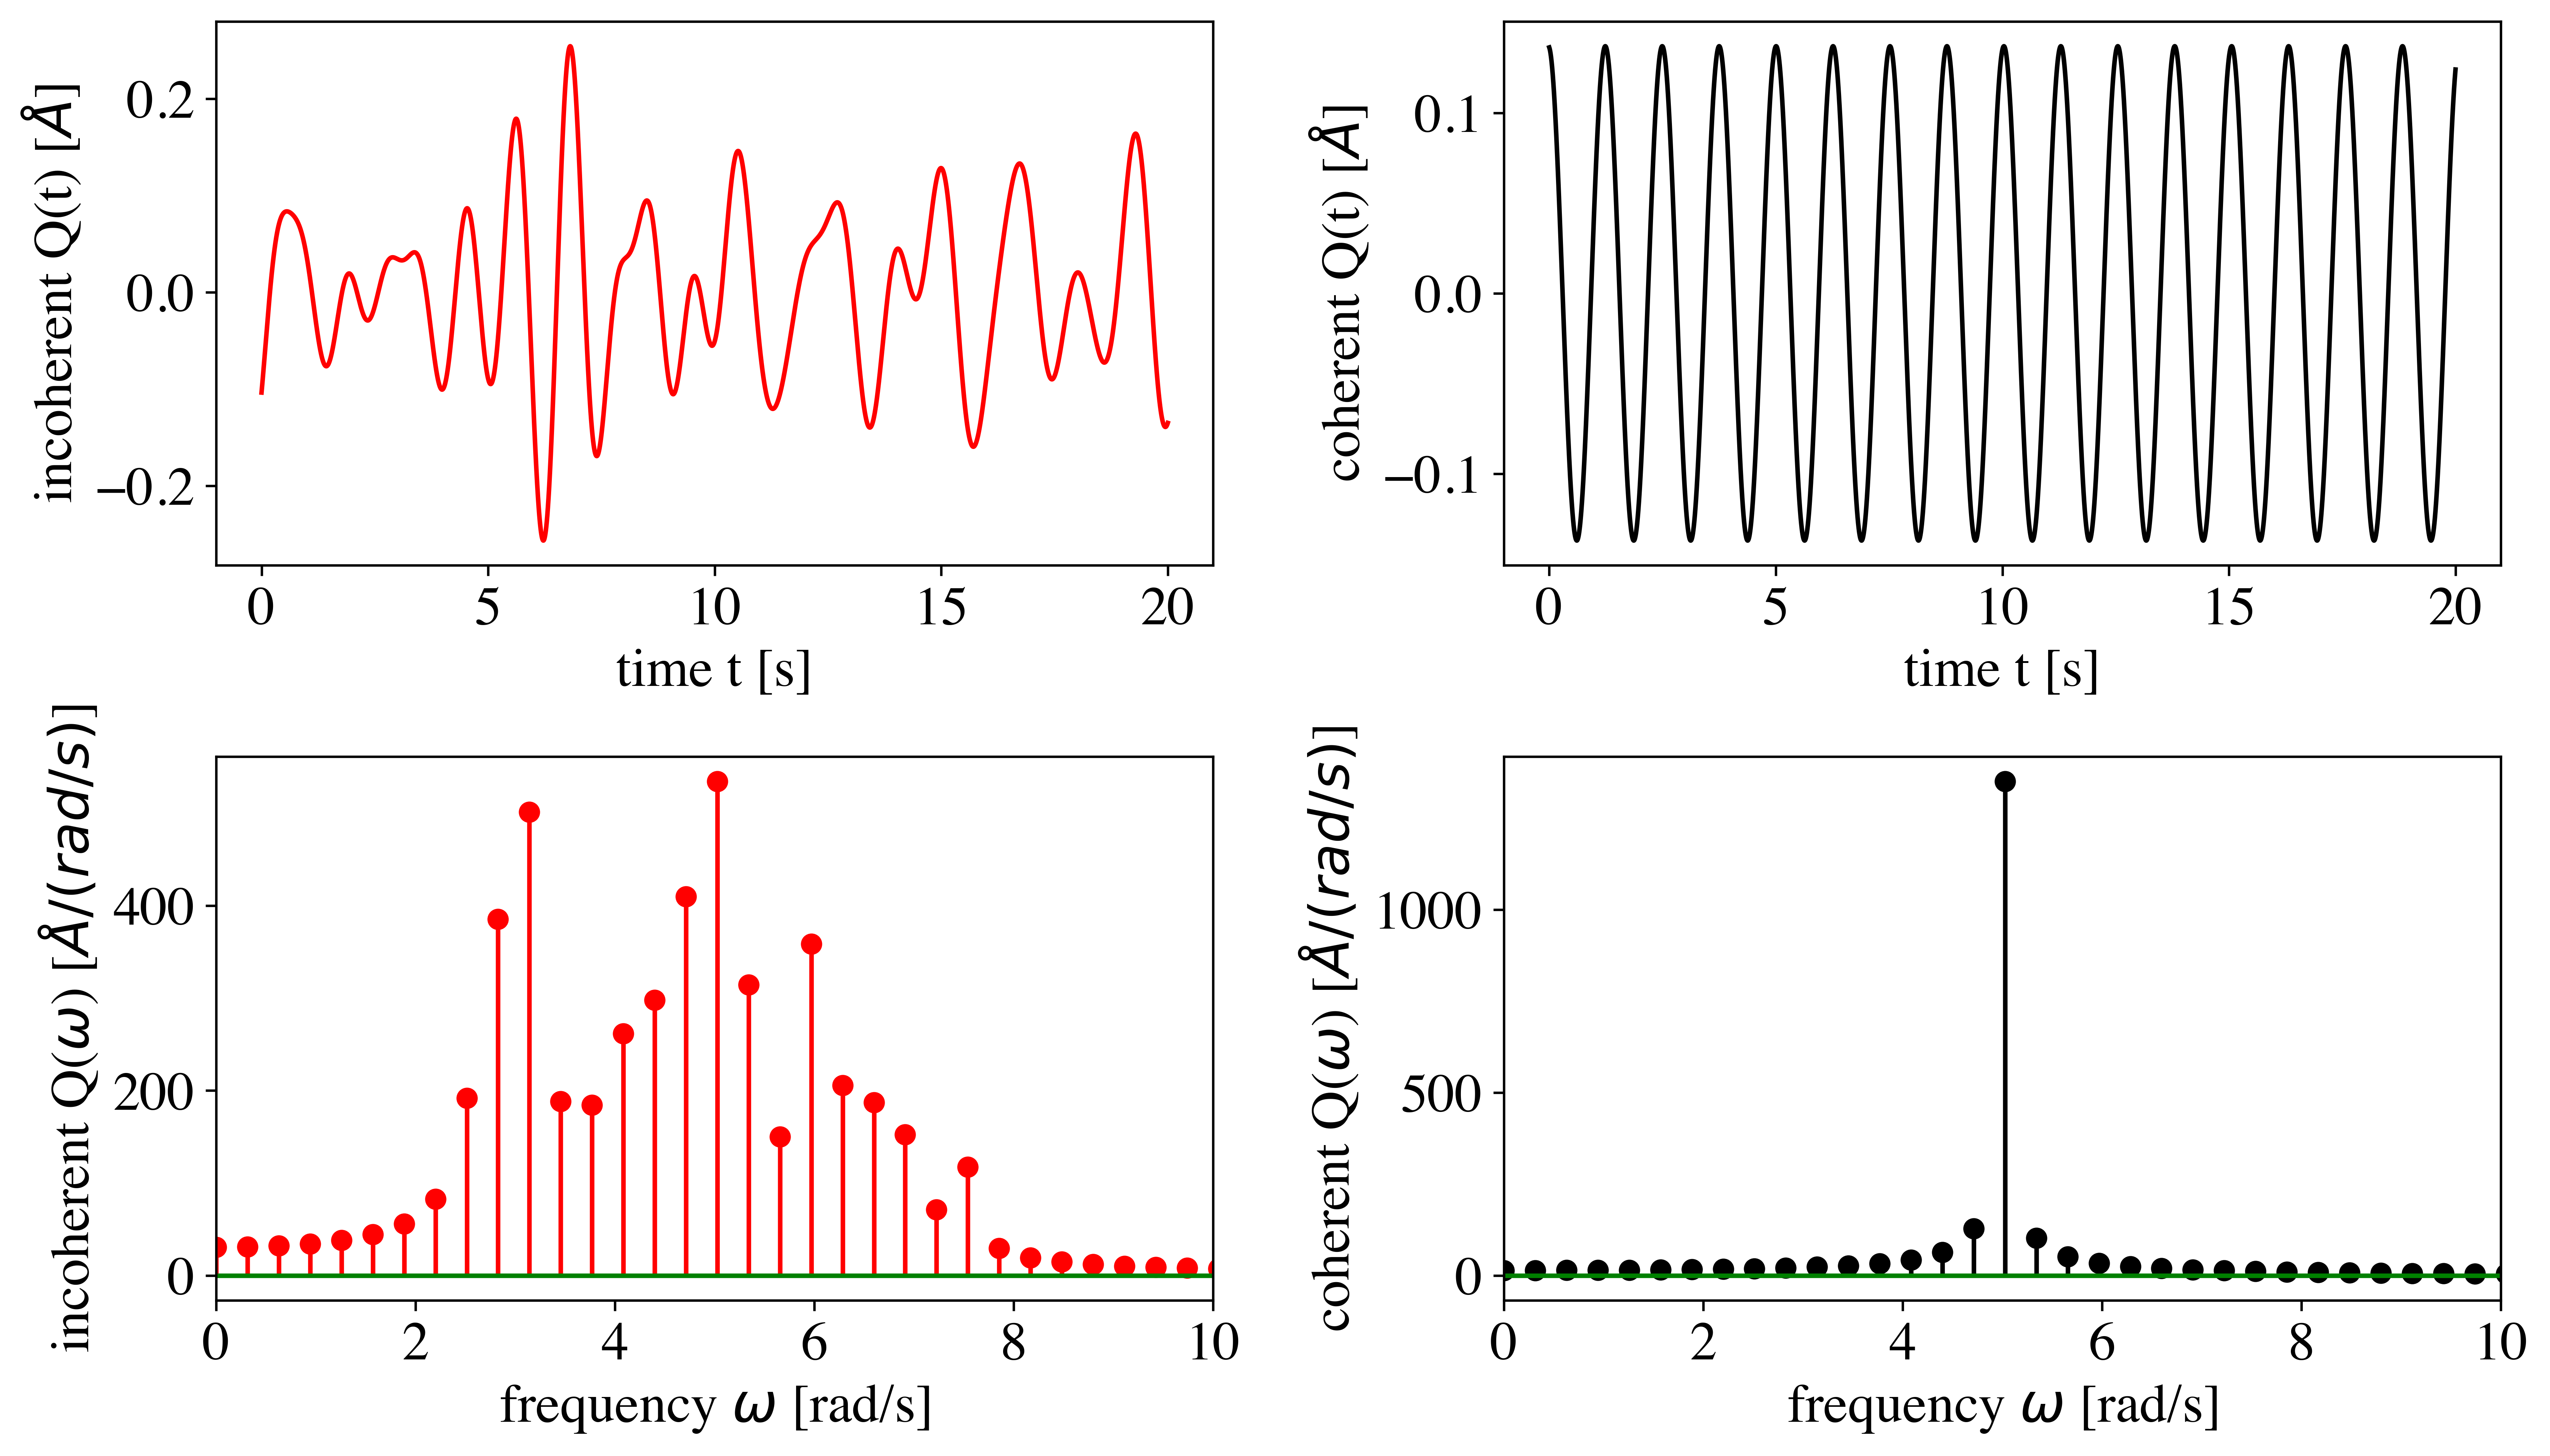

In [58]:
Fs = 1000
T = 1/Fs
t_s = np.arange(0,20,T)
a = 10e-10
q0_s = a*0.3
omR_s = 5
kR_s = 1
z_s = 0
phi_s = 0

fig,ax = plt.subplots(2,2,figsize=(12,7))
N = 500
Q = np.zeros(len(t_s),dtype='complex128')
for n in range(N):
    phi_s = (np.random.rand()-0.5)*2*np.pi
    del_omR_s = (np.random.rand()-0.5)*omR_s
    Q += q_t(q0_s,omR_s+del_omR_s,kR_s,t_s,z_s,phi_s)
ax[0,0].plot(t_s,Q/N*1e10,'-r')
ax[0,0].set_xlabel('time t [s]')
ax[0,0].set_ylabel(r'incoherent Q(t) [$\AA$]')
ax[1,0].stem(np.fft.fftfreq(len(t_s), T)[:N//2]*2*np.pi,np.abs(np.fft.fft(Q/N*1e10))[:N//2],'r')
ax[1,0].set_xlim(omR_s-omR_s,omR_s+omR_s)
ax[1,0].set_xlabel(r'frequency $\omega$ [rad/s]')
ax[1,0].set_ylabel(r'incoherent Q($\omega$) [$\AA/(rad/s)$]')
Q = np.zeros(len(t_s),dtype='complex128')
for n in range(N):
    phi_s = (np.random.rand()-0.5)*2*np.pi
    del_omR_s = 0
    Q += q_t(q0_s,omR_s+del_omR_s,kR_s,t_s,z_s,phi_s)
ax[0,1].plot(t_s,Q/N*1e10)
ax[0,1].set_xlabel('time t [s]')
ax[0,1].set_ylabel(r'coherent Q(t) [$\AA$]')
ax[1,1].stem(np.fft.fftfreq(len(t_s), T)[:N//2]*2*np.pi,np.abs(np.fft.fft(Q/N*1e10))[:N//2])
ax[1,1].set_xlim(omR_s-omR_s,omR_s+omR_s)
ax[1,1].set_xlabel(r'frequency $\omega$ [rad/s]')
ax[1,1].set_ylabel(r'coherent Q($\omega$) [$\AA/(rad/s)$]')
plt.tight_layout()
plt.show()